## Business Understanding
## Data Understanding
## Overview


#### Load Data

In [181]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix,classification_report

In [157]:
stroke_df = pd.read_csv('brain_stroke.csv')
stroke_df.head(15)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [158]:
def load_and_inspect_data(file_path):
    # Load the data
    df = pd.read_csv(file_path)
    
    # Get the shape of the DataFrame
    shape = df.shape
    print("Shape of the DataFrame:", shape)
    
    # Get information about the DataFrame
    print("\nInfo about the DataFrame:")
    df.info()
    
    # Get descriptive statistics of the DataFrame
    print("\nDescriptive statistics of the DataFrame:")
    description = df.describe()
    print(description)
    
    return df

# Example usage:
file_path = 'brain_stroke.csv'
stroke_df = load_and_inspect_data(file_path)


Shape of the DataFrame: (4981, 11)

Info about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB

Descriptive statistics of the DataFrame:
               age  hypertension  heart_disease  avg_glucose_level  \
count  4981.000000   4981.00000

In [159]:
stroke_df.duplicated().sum()

0

In [160]:
stroke_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [161]:
stroke_df['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

The dataset is clearly imbalanced 

### Data Visualization

We will start with checking the relationship between the dependent variable and the numerical variables.

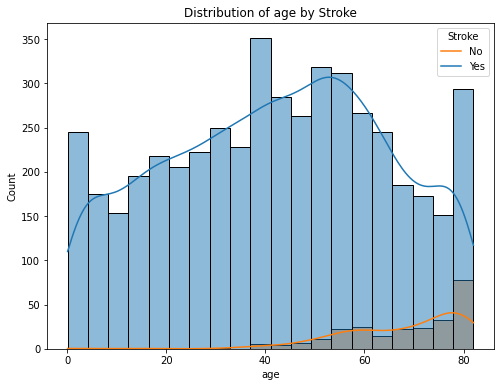

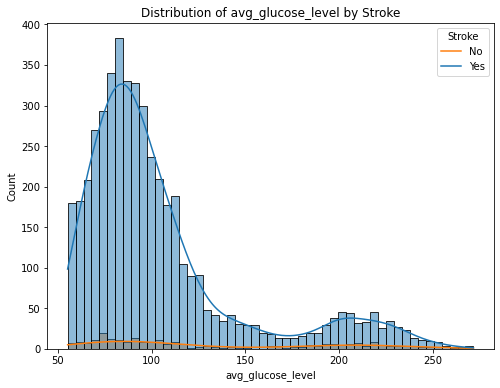

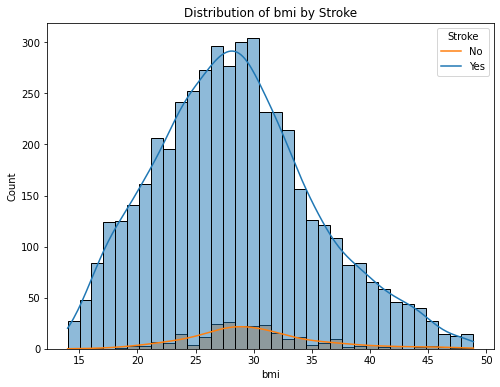

In [162]:
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
stroke_df_num = stroke_df[numerical_columns + ['stroke']]

# Plot histograms for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=stroke_df_num, x=col, hue='stroke', kde=True)
    plt.title(f'Distribution of {col} by Stroke')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Stroke', labels=['No', 'Yes'])
    plt.show()


From the above visualizations, its evident that people from the age between 60-80, with bmis between 26-32 are more likely to get a stroke.

### Categorical Variables 
We will check how the categorical variables relate with the dependent variable

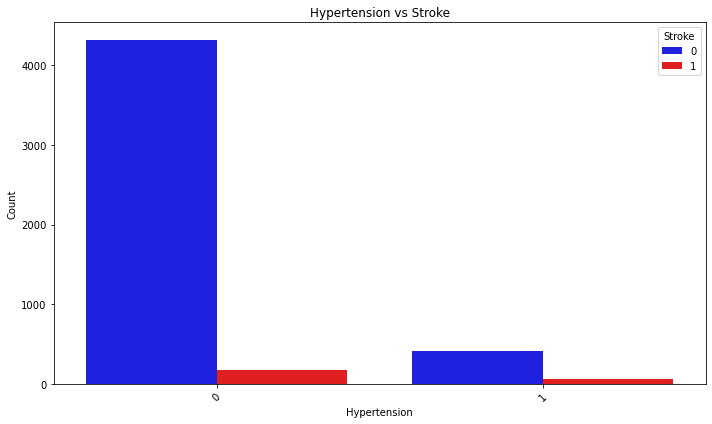

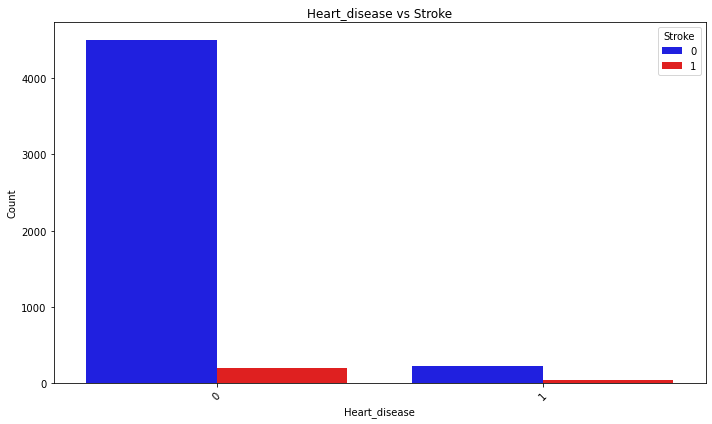

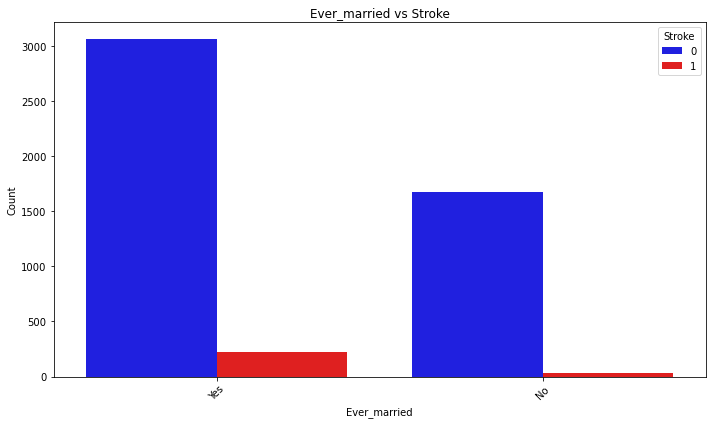

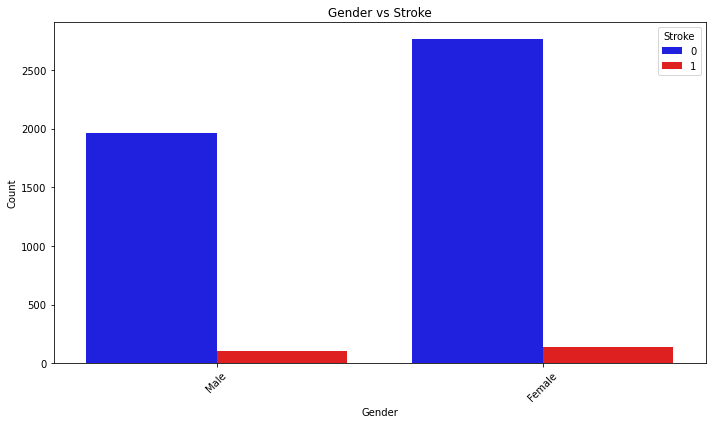

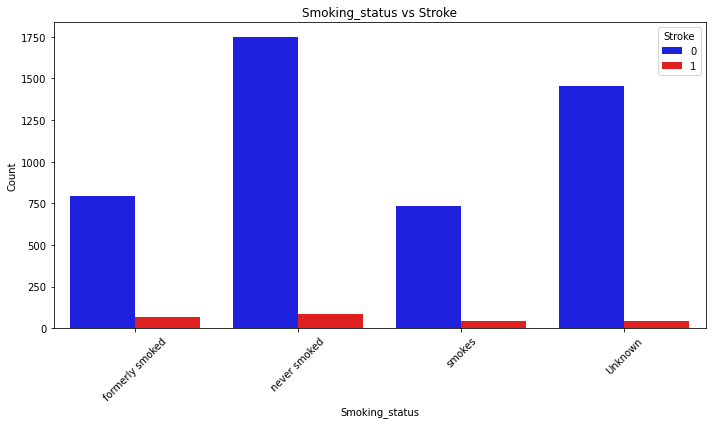

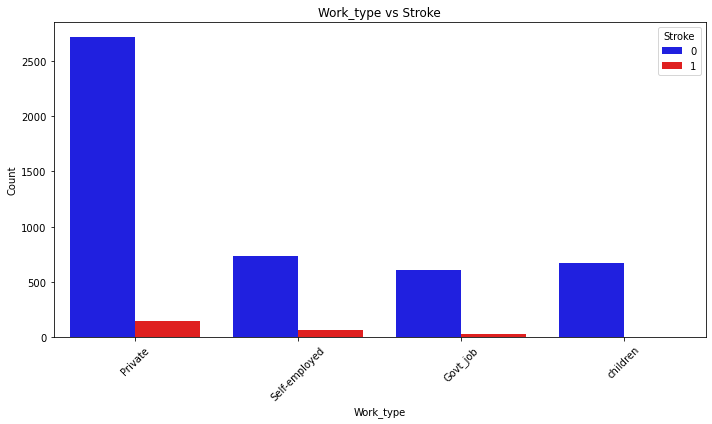

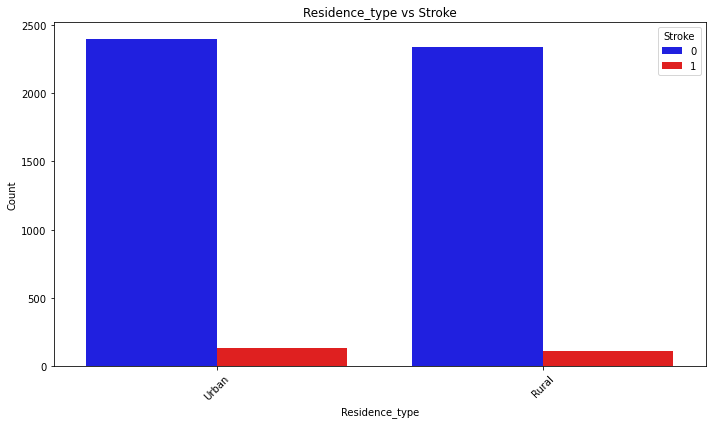

In [163]:
categorical_columns = ['hypertension', 'heart_disease', 'ever_married', 'gender', 'smoking_status', 'work_type', 'Residence_type']

# Set color palette
colors = ['blue', 'red']

# Loop through each categorical column and create a count plot with specified colors
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='stroke', data=stroke_df, palette=colors)
    plt.title(f'{column.capitalize()} vs Stroke')
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.legend(title='Stroke', loc='upper right')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

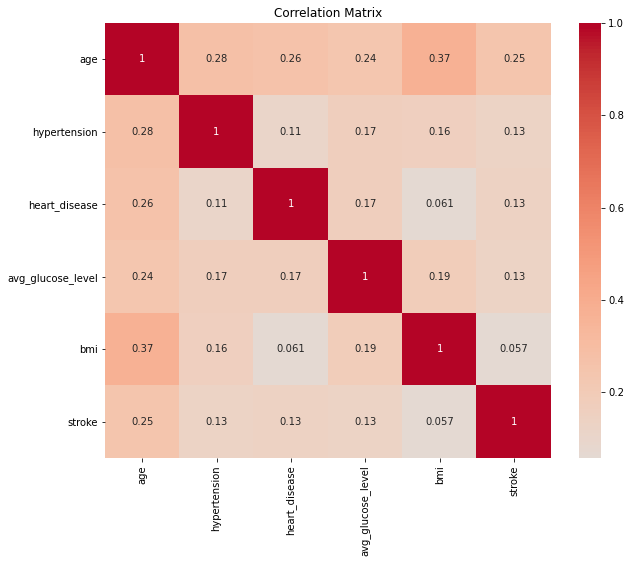

In [164]:
correlation_matrix = stroke_df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering

In [165]:
stroke_df = pd.get_dummies(stroke_df, columns=['smoking_status'])

In [166]:
label_encoder = LabelEncoder()
stroke_df['ever_married'] = label_encoder.fit_transform(stroke_df['ever_married'])
stroke_df['gender'] = label_encoder.fit_transform(stroke_df['gender'])

Now I will drop the variables that don't seem relevant 

In [167]:
stroke_df=stroke_df.drop(['work_type'],axis=1)
stroke_df=stroke_df.drop(['Residence_type'],axis=1)

In [168]:
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,228.69,36.6,1,0,1,0,0
1,1,80.0,0,1,1,105.92,32.5,1,0,0,1,0
2,0,49.0,0,0,1,171.23,34.4,1,0,0,0,1
3,0,79.0,1,0,1,174.12,24.0,1,0,0,1,0
4,1,81.0,0,0,1,186.21,29.0,1,0,1,0,0


### Train Test Split

In [169]:
X = stroke_df.drop(['stroke'],axis=1)
y = stroke_df['stroke']

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)

In [171]:
mm_scaler = MinMaxScaler()
X_train = mm_scaler.fit_transform(X_train)
X_test = mm_scaler.transform(X_test)

### Training the model
I will be using the logistic regression as my baseline model.

In [182]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))

Logistic Regression accuracy score with all the features: 93.7813
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       935
           1       0.00      0.00      0.00        62

    accuracy                           0.94       997
   macro avg       0.47      0.50      0.48       997
weighted avg       0.88      0.94      0.91       997



c:\Users\NDUTA\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [183]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[935,   0],
       [ 62,   0]], dtype=int64)

I will try to balance the dataset to see if it affects the performance

In [174]:
from imblearn.over_sampling import SMOTE
# Initialize SMOTE instance
smote = SMOTE(sampling_strategy=1)  # Here, sampling_strategy=1 means to make the number of samples of the minority class equal to the majority class

# Apply SMOTE
X_train_new, y_train_new = smote.fit_resample(np.array(X_train), np.array(y_train))

# Check the distribution of the target after SMOTE
target_distribution_after_smote = pd.Series(y_train_new).value_counts()

target_distribution_after_smote

1    3798
0    3798
dtype: int64

[Text(0, 0, 'Class 0'), Text(1, 0, 'Class 1')]

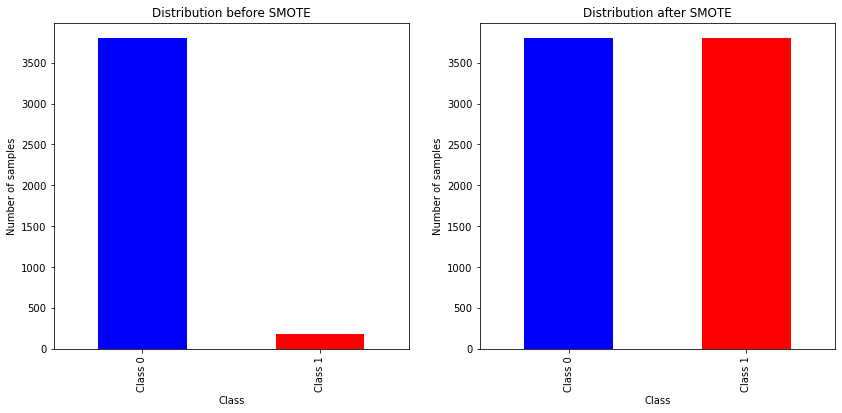

In [175]:
# Initial distribution
initial_distribution = pd.Series(y_train).value_counts()


# Distribution after SMOTE
after_smote_distribution = pd.Series(y_train_new).value_counts()

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

initial_distribution.plot(kind='bar', ax=ax[0], color=['blue', 'red'])
ax[0].set_title('Distribution before SMOTE')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Number of samples')
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['Class 0', 'Class 1'])

after_smote_distribution.plot(kind='bar', ax=ax[1], color=['blue', 'red'])
ax[1].set_title('Distribution after SMOTE')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Number of samples')
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['Class 0', 'Class 1'])

In [184]:
# Train the Logistic Regression model on the SMOTE-augmented data
logreg_new = LogisticRegression()
logreg_new.fit(X_train_new, y_train_new)

# Validate the model on the original validation set
y_pred_new = logreg_new.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred_new)*100))
print(classification_report(y_test, y_pred))


Logistic Regression accuracy score with all the features: 73.8215
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       935
           1       0.00      0.00      0.00        62

    accuracy                           0.94       997
   macro avg       0.47      0.50      0.48       997
weighted avg       0.88      0.94      0.91       997



c:\Users\NDUTA\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [185]:
conf_matrix = confusion_matrix(y_test, y_pred_new)
conf_matrix

array([[685, 250],
       [ 11,  51]], dtype=int64)